In [1]:
include("Graphing_fns.jl")
include("module_PreB_fns_using_structs.jl")
using .PreB_fns_using_structs
using .Graphing_fns
using JLD2
using Plots
using LinearAlgebra
using ITensors
using LaTeXStrings

In [2]:
job_id = 5068644
foldername ="\\NESS_"*string(job_id)
data_dir = pwd()*foldername
#Maps
map_dir = data_dir*"\\maps_"*string(job_id)
map_files = readdir(map_dir, join=true, sort=true)
Λ_list = Any[]
t_list = Any[]
corr_list = Any[]
structs = load_object(map_files[1])
P,DP = structs[4],structs[5];
for file in map_files
    data = load_object(file)    
    push!(Λ_list,data[1])
    push!(corr_list,data[2])
    push!(t_list,data[3])
end
map_perm = sortperm(t_list)
Λ_list = Λ_list[map_perm]
corr_list = corr_list[map_perm]
sort!(t_list);


In [3]:
t_list

37-element Vector{Any}:
  0.5
  1.0
  1.5
  2.0
  2.5
  3.0
  3.5
  4.0
  4.5
  5.0
  5.5
  6.0
  6.5
  ⋮
 13.0
 13.5
 14.0
 14.5
 15.0
 15.5
 16.0
 16.5
 17.5
 18.0
 18.5
 19.0

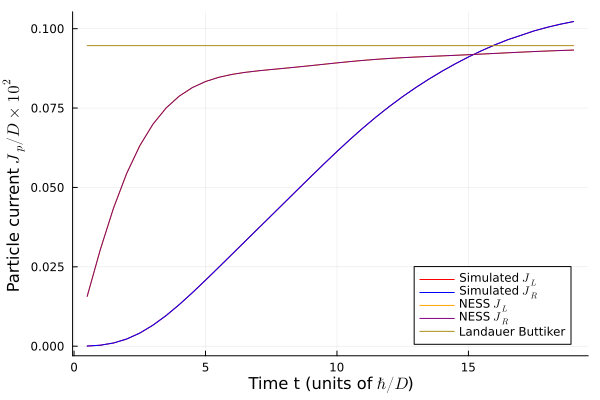

In [4]:
JL_list = []
JR_list = []
den_list = []
(;D) = P
fac = 100/D
for i=1:length(corr_list)
    NESS_bool = false
    JL,JR,den = three_site_current_operator(corr_list[i],NESS_bool,P,DP)
    push!(JL_list,JL)
    push!(JR_list,JR)
    push!(den_list,den)
end

##Calculating the properties of the NESS state
spec_l,vec_l,mat_l,JL_NESS_l,JR_NESS_l,den_NESS_l,fid_l,tr_l = NESS_calculations(Λ_list,DP,P);

Jp,Je,n = LB_current(P,DP)
Jp = Jp*ones(length(t_list))

plot(t_list, real.(fac*JL_list), label=L"Simulated $J_{L}$", linecolor=:red)
plot!(t_list, real.(fac*JR_list), label=L"Simulated $J_{R}$", linecolor=:blue)
plot!(t_list, real.(fac*JL_NESS_l), label=L"NESS $J_{L}$", linecolor=:orange)
plot!(t_list, real.(fac*JR_NESS_l), label=L"NESS $J_{R}$", linecolor=:purple)
display(plot!(t_list, fac*Jp,label="Landauer Buttiker",xlabel=L"Time t (units of $\hbar/D$)", ylabel=L"Particle current $J_{p}/D \times 10^{2}$"))

In [8]:
100*minimum(abs.(JL_list-Jp))/Jp[1]

0.24965865344947732

┌ Info: Saved animation to C:\Users\david\OneDrive - University of Bristol\Documents\PreB project\entanglement_entropy_anim,T=2.0.gif
└ @ Plots C:\Users\david\.julia\packages\Plots\zzg7i\src\animation.jl:149


Plots.AnimatedGif("C:\\Users\\david\\OneDrive - University of Bristol\\Documents\\PreB project\\entanglement_entropy_anim,T=2.0.gif")
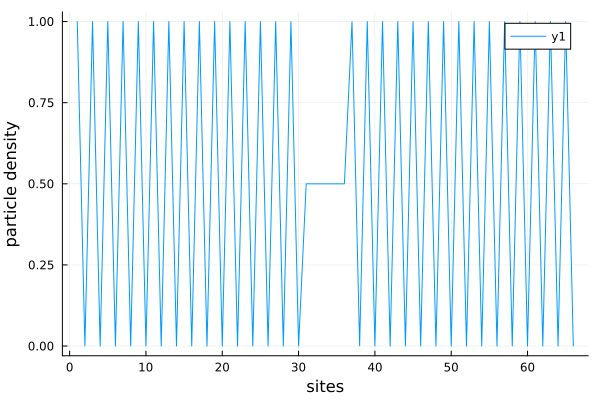

In [17]:
(;N) = DP
site_lim = N
impurity_density_animation(corr,site_lim,P,DP)